# Visualization of the multiple populations through both Matplotlib and Plotly

In [1]:
import pyco2stats as PyCO2
import numpy as np
import matplotlib.pyplot as plt

# my synthetic sample
my_means = np.array([0.7, 2])
my_stds = np.array([0.6, 0.4])
my_weights = np.array([0.4, 0.6])

my_sample = PyCO2.GMM.sample_from_gmm(n_samples= 100, means=my_means, 
                                     stds=my_stds, weights=my_weights, random_state=42)

# number of components
n_comp = 2

# Fit GMM using EM algorithm
EM_mu, EM_std, EM_w, EM_ll = PyCO2.GMM.gaussian_mixture_em(my_sample, n_comp)

# Fit GMM using EM algorithm implemented using scikit-learn (skEM))
skEM_mu, skEM_std, skEM_w, skEM_ll = PyCO2.GMM.gaussian_mixture_sklearn(my_sample, n_comp)

# Fit GMM using the constrained Gradient Descent (cGD) algorithm
mean_bounds = [(-0.5, 1.5), (1, 3)]
std_bounds = [(0.1, 2.5), (0.1, 2.5)]

cGD_mu, cGD_std, cGD_w = PyCO2.GMM.constrained_gaussian_mixture(my_sample, mean_bounds, 
                                                                 std_bounds, n_comp, verbose=False)
    

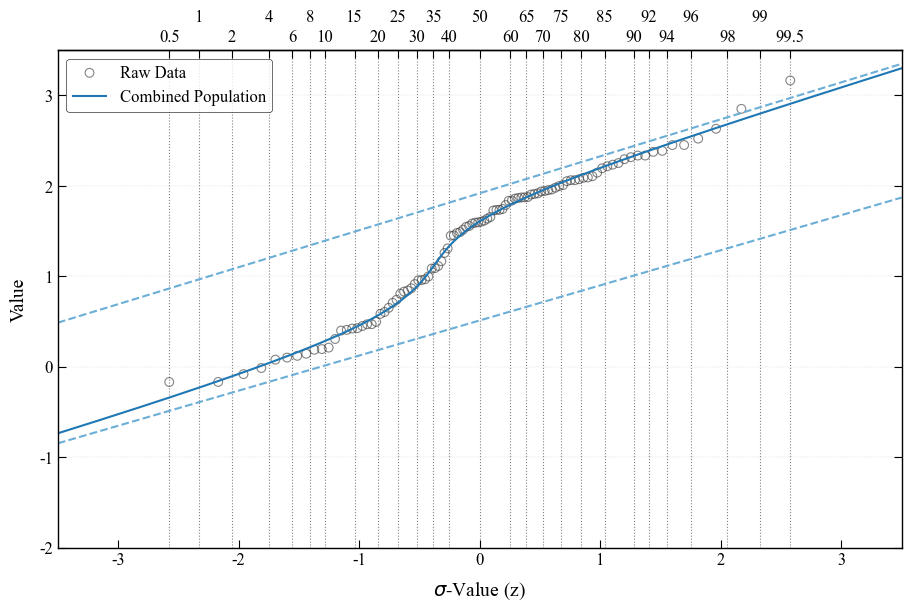

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pyco2stats as PyCO2

# 1) Enable constrained_layout and set up font‐fallback for missing glyphs
plt.rcParams['font.family']        = ['Times New Roman', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False   # use ASCII minus

# 2) Global style tweaks
plt.rcParams.update({
    'font.size':        12,
    'axes.linewidth':   1.0,
    'axes.edgecolor':   'black',
    'xtick.direction':  'in',
    'ytick.direction':  'in',
    'xtick.major.size': 6,
    'ytick.major.size': 6,
    'grid.color':       'gray',
    'grid.linestyle':   '--',
    'grid.linewidth':   0.3,
    'grid.alpha':       0.3,
})

# ── 3) Draw the figure ─────────────────────────────────────────────
fig, ax = plt.subplots(figsize=(9, 6), constrained_layout=True)

# 3a) Raw data as open circles
PyCO2.Visualize_Mpl.pp_raw_data(
    my_sample,
    ax=ax,
    marker='o',
    s=40,
    c='none',
    edgecolor='#333333',
    linewidth=0.8,
    alpha=0.6,
    label='Raw Data'
)

# 3b) Combined mixture curve
PyCO2.Visualize_Mpl.pp_combined_population(
    skEM_mu, skEM_std, skEM_w,
    ax=ax,
    linestyle='-',
    linewidth=1.5,
    color='#1f78b4',
    label='Combined Population'
)

# 3c) Individual component curves
PyCO2.Visualize_Mpl.pp_single_populations(
    skEM_mu, skEM_std,
    ax=ax,
    linestyle='--',
    linewidth=1.5,
    color='#6baed6'
)

# 3d) Percentiles
PyCO2.Visualize_Mpl.pp_add_percentiles(
    ax=ax,
    percentiles='full',
    linestyle=':',
    linewidth=0.8,
    color='gray',
    label_size=12,
    zorder=0
)

# ── 4) Axes limits, labels, grid & spines ──────────────────────────
ax.set_xlim(-3.5, 3.5)
ax.set_ylim(-2.0, 3.5)
ax.set_xlabel(r'$\sigma$-Value (z)', fontsize=14, labelpad=8)
ax.set_ylabel('Value',            fontsize=14, labelpad=8)

ax.grid(axis='y')


# draw ticks on both sides
ax.yaxis.set_ticks_position('both')
ax.tick_params(axis='y', which='both', labelright=False, right=True, left=True)

# ── 5) Legend ─────────────────────────────────────────────────────
leg = ax.legend(
    loc='upper left',
    frameon=True,
    framealpha=0.8,
    edgecolor='black',
    fontsize=12
)
leg.get_frame().set_linewidth(0.5)

# ── 6) Save & show ─────────────────────────────────────────────────
plt.savefig("Visualize_Sinclair_Mpl.png", dpi=300, bbox_inches='tight')
plt.show()


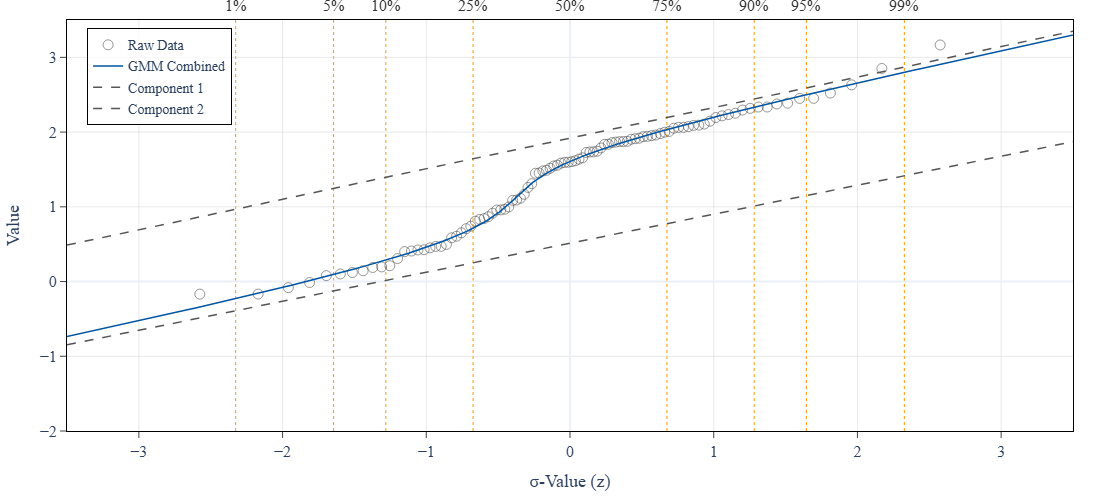

In [3]:
import numpy as np
from scipy.stats import norm
import pyco2stats as PyCO2
from pyco2stats.visualize_plotly import Visualize_Plotly
import plotly.graph_objects as go
import plotly.io as pio

# ── 2) Base Figure ──────────────────────────────────────────────────
fig = go.Figure()

# Raw data as semi‐transparent circles
Visualize_Plotly.pp_raw_data(
    raw_data=my_sample.flatten(),
    fig=fig,
    marker_kwargs={
        'marker': {'size':10, 'color':'#333333', 'symbol':'circle-open'},
        'opacity':0.5
    }
)

# Combined GMM curve
Visualize_Plotly.pp_combined_population(
    means=skEM_mu, stds=skEM_std, weights=skEM_w,
    fig=fig,
    line_kwargs={'color':'#0055A4', 'width':1.5}
)

# Individual components
Visualize_Plotly.pp_single_populations(
    means=skEM_mu, stds=skEM_std,
    fig=fig,
    line_kwargs={'dash':'dash', 'width':1.5, 'color':'#555555'}
)

# ── 3) Axis Limits & Styling ───────────────────────────────────────
X_MIN, X_MAX = -3.5, 3.5
Y_MIN, Y_MAX = -2.0,  3.5

fig.update_xaxes(
    range=[X_MIN, X_MAX],
    title_text='σ-Value (z)',
    title_font=dict(size=18),
    tickfont=dict(size=16),
    showline=True, linecolor='black', linewidth=1,
    mirror=True, ticks='outside', ticklen=6
)
fig.update_yaxes(
    range=[Y_MIN, Y_MAX],
    title_text='Value',
    title_font=dict(size=18),
    tickfont=dict(size=16),
    showline=True, linecolor='black', linewidth=1,
    mirror=True, ticks='outside', ticklen=6
)

# light grid
fig.update_xaxes(showgrid=True, gridcolor='lightgray', gridwidth=0.5)
fig.update_yaxes(showgrid=True, gridcolor='lightgray', gridwidth=0.5)

# ── 4) Percentiles ─────────────────────────────────────────────────
Visualize_Plotly.pp_add_percentiles(
    fig=fig,
    percentiles="full",
    line_kwargs={'color':'#FF9900','dash':'dot','width':1},
    label_kwargs={'font':{'size':16,'color':'#333333'},
                  'showarrow':False,'yshift':14},
    y_min=Y_MIN, y_max=Y_MAX
)

# ── 5) Legend ───────────────────────────────────────────────────────
labels = ['Raw Data','GMM Combined','Component 1','Component 2']
for i, nm in enumerate(labels):
    fig.data[i].name      = nm
    fig.data[i].showlegend = True

# hide any extra
for tr in fig.data[len(labels):]:
    tr.showlegend = False

fig.update_layout(
    width=900, height=500,
    template='plotly_white',
    font_family='Times New Roman',
    font_size=18,
    margin=dict(l=60, r=20, t=20, b=60),
    legend=dict(
        x=0.02, y=0.98,
        bordercolor='black', borderwidth=1,
        bgcolor='rgba(255,255,255,0.7)',
        font=dict(size=14)
    )
)

fig.show()

pio.write_image(fig, "Visualize_Sinclair_Plotly.png", width=900, height=500, scale=2)
